In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib as plt
%matplotlib inline

/Users/varya_hai/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/varya_hai/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
sns.set_theme(
    font_scale = 2,                         # размер шрифта
    style      = 'whitegrid',               # стиль поля графика
    rc         = {'figure.figsize':(20,10)}  # размер фигуры
)

1.	Загрузите данные, проверьте число наблюдений и столбцов, типы данных, наличие пропущенных значений, какие уникальные значения встречаются.

In [3]:
conversion = pd.read_csv('/Users/varya_hai/Karpov.courses/2.9 conversion.csv')

In [4]:
conversion.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [5]:
conversion.dtypes

ad_id                    int64
xyz_campaign_id          int64
fb_campaign_id           int64
age                     object
gender                  object
interest                 int64
Impressions              int64
Clicks                   int64
Spent                  float64
Total_Conversion         int64
Approved_Conversion      int64
dtype: object

In [6]:
conversion.isna().sum()

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

In [7]:
conversion.nunique()

ad_id                  1143
xyz_campaign_id           3
fb_campaign_id          691
age                       4
gender                    2
interest                 40
Impressions            1130
Clicks                  183
Spent                   869
Total_Conversion         32
Approved_Conversion      16
dtype: int64

2.	Постройте график распределения числа показов (Impressions) для каждой рекламы, прологарифмировав значения.

<AxesSubplot:xlabel='Impressions', ylabel='Count'>

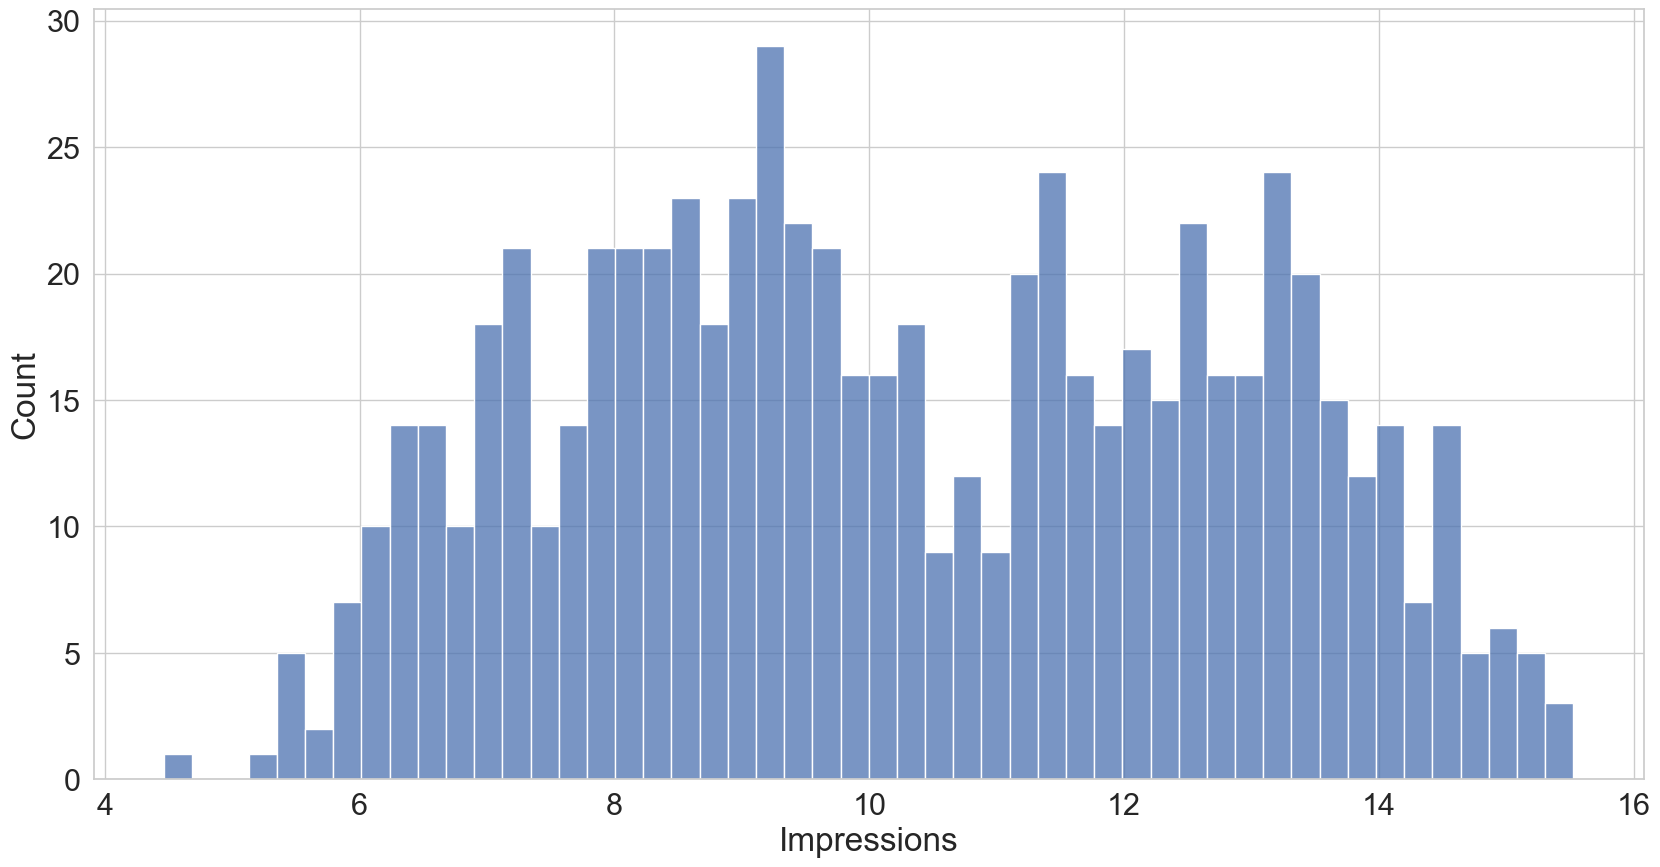

In [9]:
sns.histplot(np.log(conversion.groupby('fb_campaign_id').Impressions.sum()),bins=50)

# распределение получилось ненормальным и бимодальным

3.	Создайте новую колонку c CTR. Посмотрите на описательные статистики и распределение.

In [11]:
conversion['CTR'] = conversion.Clicks/conversion.Impressions*100

In [12]:
conversion.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.013605
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.011198
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.023480
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.024195


In [13]:
conversion.CTR.describe()

count    1143.000000
mean        0.016420
std         0.011506
min         0.000000
25%         0.010022
50%         0.015981
75%         0.023364
max         0.105932
Name: CTR, dtype: float64

4.	Проанализируйте CTR с разбивкой по рекламной кампании.

<AxesSubplot:xlabel='CTR', ylabel='Count'>

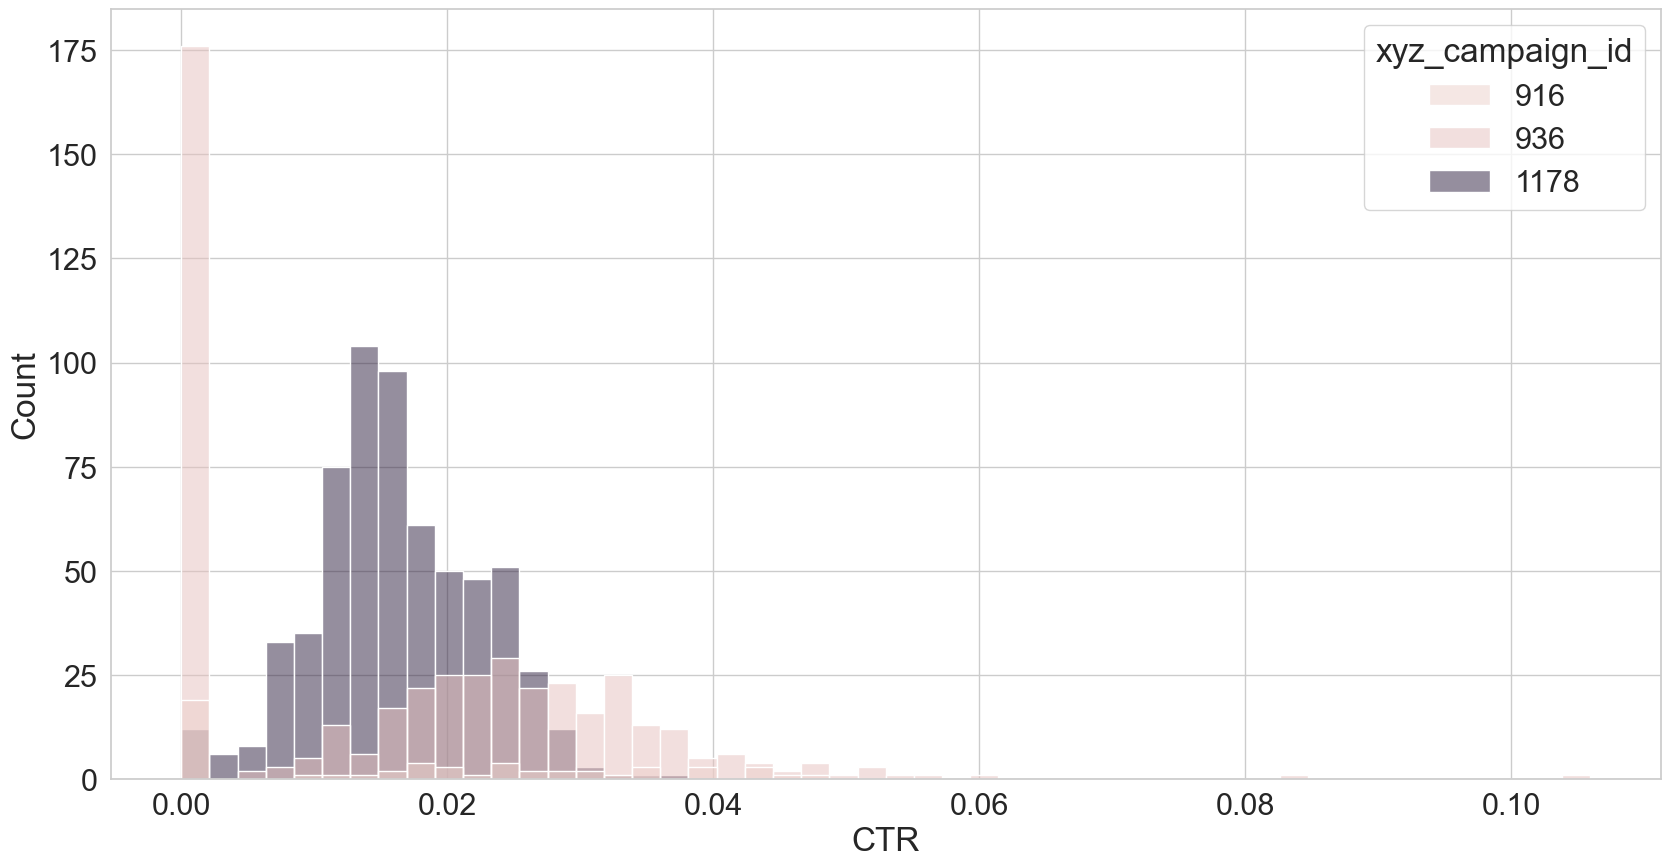

In [14]:
sns.histplot(data=conversion,x='CTR',hue='xyz_campaign_id',bins=50)

<AxesSubplot:xlabel='CTR', ylabel='Count'>

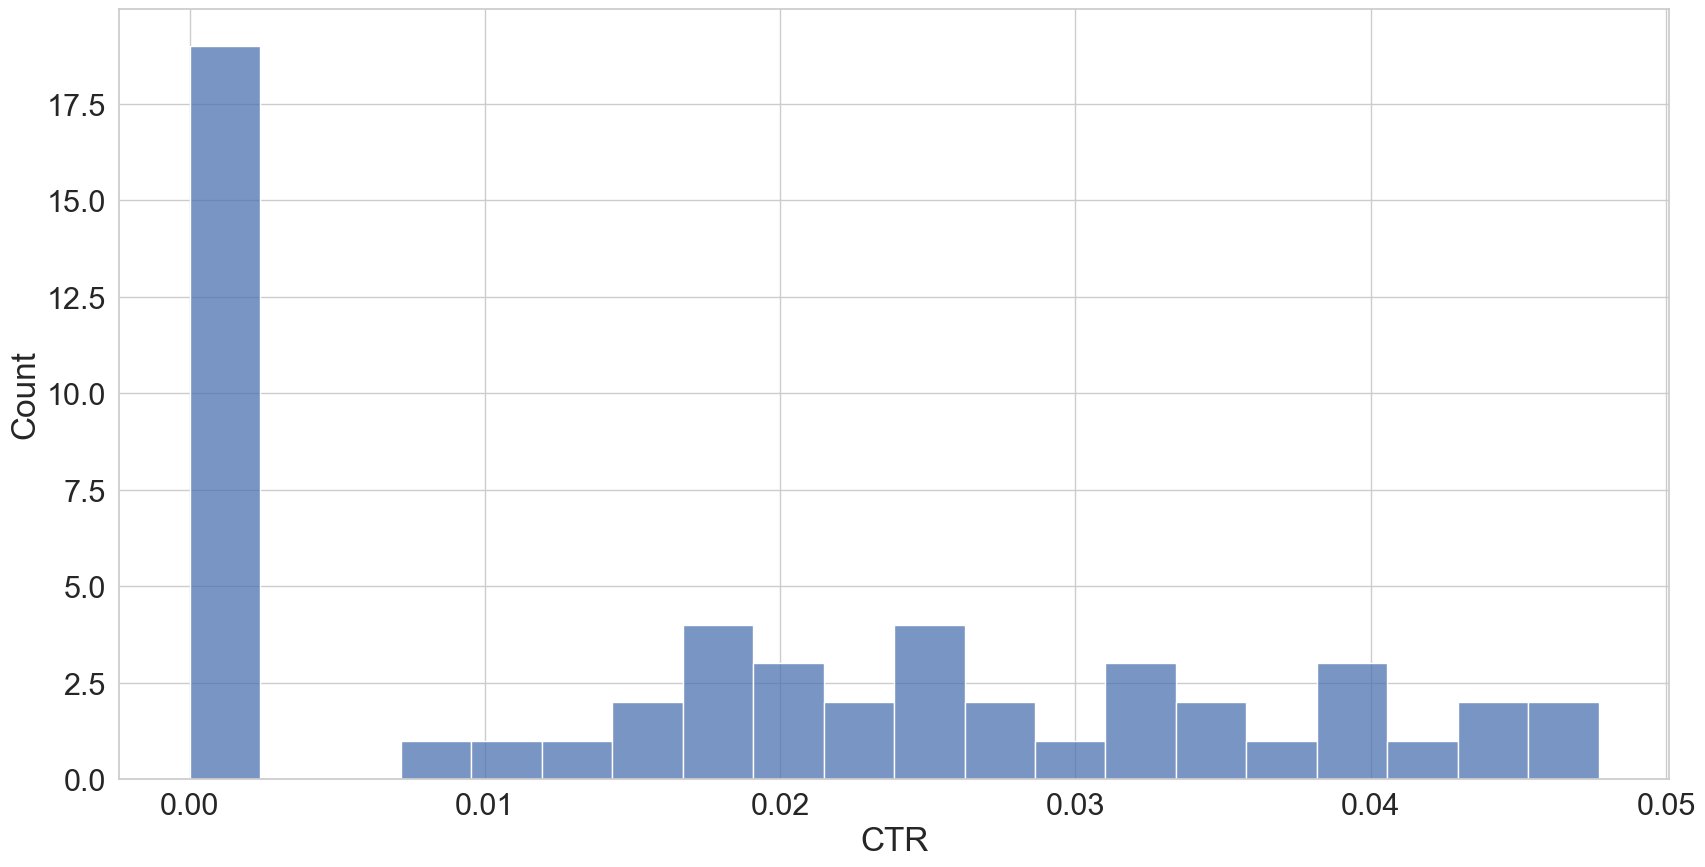

In [36]:
sns.histplot(x=conversion.query('xyz_campaign_id==916').CTR,bins=20)

5.	Посчитайте стоимость за клик пользователя по объявлению (CPC). Изучите полученные значения, используя меры центральной тенденции и меры изменчивости. 

In [15]:
conversion['CPC'] = conversion.Spent/conversion.Clicks

In [16]:
conversion.CPC.describe()

count    936.000000
mean       1.499347
std        0.232879
min        0.180000
25%        1.390000
50%        1.498273
75%        1.644364
max        2.212000
Name: CPC, dtype: float64

In [17]:
# межквартильный размах
round(conversion.CPC.quantile(0.75)-conversion.CPC.quantile(0.25),2)

0.25

6.	Визуализируйте CPC с разбивкой по полу пользователей, которым были показаны объявления. 

<AxesSubplot:xlabel='CPC', ylabel='Count'>

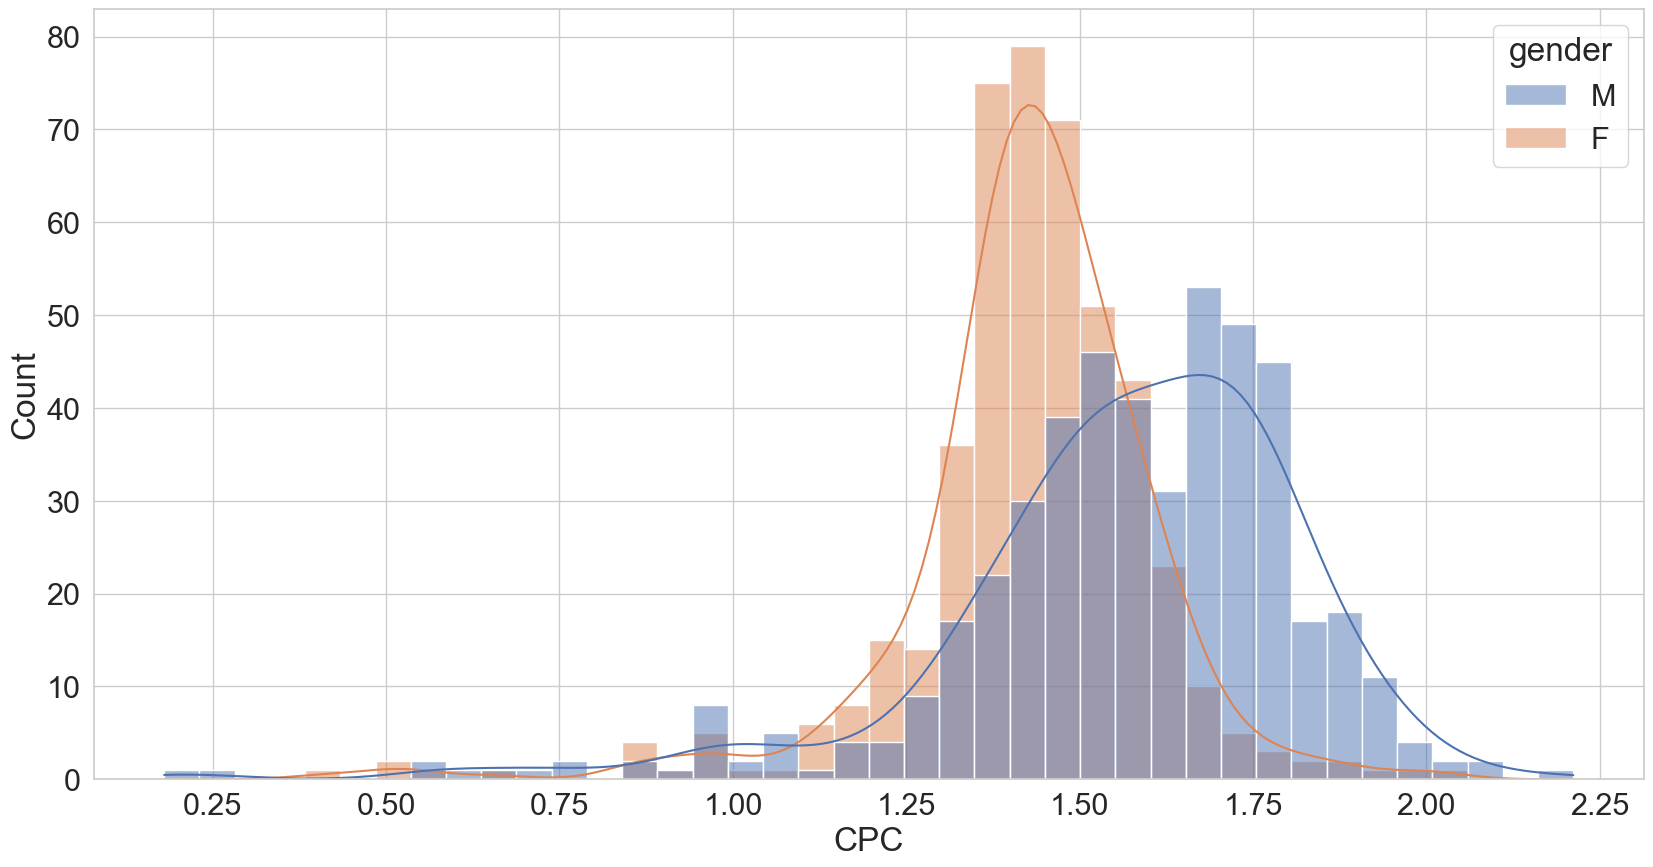

In [18]:
sns.histplot(x=conversion.CPC,hue=conversion.gender,kde=True)

7.	Посчитайте конверсию из клика в покупку.

In [19]:
conversion['conv_rate'] = conversion.Approved_Conversion/conversion.Clicks*100

In [20]:
conversion.query('ad_id==1121814').conv_rate.round(2)

860    3.09
Name: conv_rate, dtype: float64